# Prediksi Vaksin H1N1 dan Flu Musiman (Part 1 - Exploratory Data Analysis)

Notebook ini adalah laporan yang saya buat untuk menjawab tantangan yang diberikan oleh DrivenData dalam kompetisi bertajuk "Flu Shot", dimana mereka menyediakan data berupa hasil survey yang dilakukan oleh otoritas medis di Amerika Serikat kepada sejumlah responden dengan pertanyaan yang berkaitan dengan flu H1N1 dan flu musiman.

![title](img/flu-vaccine.jpg)

## Latar Belakang

Pertanyaan utama yang ingin dipecahkan pada project/tantangan yang diberikan oleh drivendata ini adalah untuk menjawab tantangan apakah kita dapat memprediksi warga yang mendapatkan vaksin dengan menggunakan informasi yang mereka bagikan, seperti latar belakang, pandangan mereka mengenai penyakit, dan laku mereka mengenai kesehatan.Dengan menggunakan informasi yang mereka berikan, yang akan digunakan sebagai prediktor, apakah dapat dibuat sebuah model yang mampu secara akurat memprediksi apakah individual ini mendapatkan vaksin.

Penelitian/model ini sebenarnya bisa diluaskan jangkauannya menjadi membuat sebuah prediksi untuk mengetahui apakah individu tertentu layak mendapatkan vaksin, berkaca pada informasi yang mereka berikan. Dalam skenario pandemi, yang saat ini sedang berlangsung di seluruh dunia, maupun ketika skenario terburuk adanya pandemi-pandemi berikutnya, pembuatan modeling menggunakan machine learning seperti ini sangat bermanfaat terutama ketika akses terhadap data dengan mudah kita kumpulkan, melalui media online, tidak harus turun langsung ke lapangan menanyakan satu per satu kepada individu yang ingin kita teliti. 

Berikut adalah informasi mengenai tantangan ini, yang bersumber dari overview yang diberikan oleh drivendata:

- Inti dari tantangan ini adalah untuk meneliti lebih dalam mengenai vaksinasi, yang merupakan tindakan utama dalam bidang kesehatan masyarakat dalam perang melawan penyakit menular. Alasannya karena vaksin memberi garansi kekebalan pada setiap individu dan semakin banyak individu yang mendapatkan vaksin akan lebih jauh mengurangi penyebaran penyakit melalui mekanisme 'herd immunity' ,istilah yang sedang populer belakangan ini.

- Tantangan ini ingin memutar memori masa lalu mengenai penanganan dan tindakan kesehatan masyarakat yang dilakukan ketikan pandemi yang berhubungan dengan gangguan pernapasan seperti H1N1 / flu babi yang menerpa beberapa negara, utamanya Amerika Serikat di tahun 2009.

- Pembuatan vaksin hingga penggulirannya membutuhkan waktu yang cukup singkat, yaitu pada Oktober 2009, vaksin ini sudah dapat diakses oleh masyarakat. Data yang digunakan pada tantangan ini berasal dari survey telepon yang dilakukan oleh otoritas di Amerika Serikat antara akhir 2009 hingga 2010, yang menanyakan responden sejumlah pertanyaan seperti apakah mereka sudah menerima vaksin H1N1 dan flu musiman, dibarengi juga pertanyaatn tambahan mengenai latar belakang sosial, ekonomi, demografis, penyakit bawaan. Mereka juga ditanyai pendapatnya mengenai vaksin dan apa saja langkah-langkah yang mereka lakukan untuk menjaga diri agar tidak tertular.

- Pemahaman mengenai variabel-variabel apa saja yang mempunyai asosiasi kuat dengan keputusan vaknisasi akan menghasilkan pola-pola tertentu yang dapat membantu penyebaran vaknisasi di masa yang akan datang atau dalam waktu dekat ini, ketika vaksin COVID-19 sudah dapat diakses oleh masyarakat.

Berikutnya, kita melakukan import terhadap package dan modul yang diperlukan untuk mempermudah pekerjaan analisis yang akan dilakukan. Tidak ada modul yang aneh atau baru disini, para pengguna aktif python tentu tidak asing dengan modul seperti numpy, pandas, scikit-learn, matplotlib, dan seaborn. Bagi para analis data, keberadaan modul ini sangat membantu untuk mempercepat pengerjaan analisa data, terutama ketika berhadapan dengan mahadata (big data) yang seringkali belum "bersih" dan membutuhkan proses-proses lanjutan. 

In [69]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
import scipy
import matplotlib.pyplot as plt
# import plotly
import os
import seaborn as sns

Ada 35 kolom berisikan informasi yang didapatkan/dikumpulkan berdasarkan survei telepon yang dilakukan oleh otoritas kesehatan Amerika Serikat. 35 kolom ini adalah calon variabel yang akan digunakan dalam pembuatan model, tergantung pada tingkat korelasi antar variabel dan antara variabel dengan target. Namun sebelum lebih jauh, kita harus memahami dengan benar dan teliti bagaimana penjelasan dari masing-masing informasi yang dikumpulkan pada tiap kolom ini.

Di bawah ini adalah penjelasan dari setiap variabel dalam setiap kolom beserta penjelasannya:

1. h1n1_concern - Tingkat perhatian/kekhawatiran terhadap virus H1N1.
   - 0 = Sama sekali tidak khawatir; 1 = Tidak khawatir; 2 = Cukup khawatir; 3 = Sangat khawatir.
2. h1n1_knowledge - Tingkat pengetahuan tentang flu H1N1.
   - 0 = Tidak memiliki pengetahuan; 1 = Sedikit memiliki pengetahuan; 2 = Punya banyak pengetahuan.
3. behavioral_antiviral_meds - Telah meminum obat antivirus. (binary)
4. behavioral_avoidance - Telah menghindari kontak jarak dekat dengan orang yang memiliki gejala seperti flu. (binary)
5. behavioral_face_mask - Membeli masker. (binary)
6. behavioral_wash_hands - Mencuci tangan secara berkala atau menggunakan hand sanitizer. (binary)
7. behavioral_large_gatherings - Mengurangi waktu berada di perkumpulan besar. (binary)
8. behavioral_outside_home - Mengurangi kontak dengan orang yang berada di luar rumahnya. (binary)
9. behavioral_touch_face - Menghindari menyentuh mata, hidung, mulut. (binary)
10. doctor_recc_h1n1 - vaksin flu H1N1 direkomendasikan oleh dokter. (binary)
11. doctor_recc_seasonal - vaksin flu musiman direkomendasikan oleh dokter. (binary)
12. chronic_med_condition - Mengidap salah satu dari penyakit kronis sebagai berikut: asma dan gangguan paru-paru lainnya, diabetes, gangguan jantung, gangguan lambung, anemia, gangguan neurologis dan neuromuskuler, kondisi hati, sistem imun melemah disebabkan penyakit kronik bawaan atau karena sebab obat penyakit kronis yang diminum. (binary)
13. child_under_6_months - Kontak langsung secara sering dengan anak kecil di bawah enam bulan. (binary)
14. health_worker - Berstatus sebagai pekerja medis. (binary)
15. health_insurance - Memiliki asuransi kesehatan. (binary)
16. opinion_h1n1_vacc_effective - Opini responden tentang efektivitas vaksin flu H1N1.
    - 1 = Sama sekali tidak efektif; 2 = Sangat tidak efektif; 3 = Tidak tahu; 4 = Cukup efektif; 5 = Sangat efektif.
17. opinion_h1n1_risk - Opini responden mengenai risiko terkena virus H1N1 tanpa vaksin.
    - 1 = Sangat kecil; 2 = Cukup kecil; 3 = Tidak tahu; 4 = Cukup besar; 5 = Sangat besar.
18. opinion_h1n1_sick_from_vacc - Kekhawatiran responden akan jatuh sakit setelah menerima vaksin H1N1.
    - 1 = Tidak khawatir sama sekali; 2 = Tidak terlalu khawatir; 3 = Tidak tahu; 4 = Cukup khawatir; 5 = Sangat khawatir.
19. opinion_seas_vacc_effective - Opini responden mengenai efektivitas vaksin flu musiman.
    - 1 = Sama sekali tidak efektif; 2 = Tidak cukup efektif; 3 = Tidak tahu; 4 = Cukup efektif; 5 = Sangat efektif.
20. opinion_seas_risk - Opini responden mengenai kemungkinan risiko terkena virus flu musiman tanpa vaksin.
    - 1 = Sangat rendah; 2 = Cukup rendah; 3 = Tidak tahu; 4 = Cukup tinggi; 5 = Sangat tinggi.
21. opinion_seas_sick_from_vacc - Kekhawatiran responden akan jatuh sakit setelah menerima vaksin flu musiman.
    - 1 = Tidak khawatir sama sekali; 2 = Tidak terlalu khawatir; 3 = Tidak tahu; 4 = Cukup khawatir; 5 = Sangat khawatir.
22. age_group - Kelompok umur dari responden.
23. education - Tingkat pendidikan responden yang mereka isi sendiri.
24. race - Jenis ras responden.
25. sex - Jenis kelamin responden.
26. income_poverty - Pendapatan tahunan responden berdasarkan ambang kemiskinan sensus penduduk 2008.
27. marital_status - Status perkawinan responden.
28. rent_or_own - Status kepelimikan rumah responden.
29. employment_status - Status pekerjaan responden.
30. hhs_geo_region - Kawasan tempat tinggal responded menggunakan klasifikasi geografis 10-daerah yang ditentukan oleh Departemen Kesehatan dan Layanan Masyarakat Amerika Serikat. Nilainya ditulis dengan karakter acak.
31. census_msa - Kawasan tempat tinggal responden di dalam area statistik metropolitan yang ditentukan oleh lembaga sensus Amerika Serikat
32. household_adults - Jumlah orang dewasa lain dalam satu rumah.
33. household_children - Jumlah anak kecil dalam satu rumah.
34. employment_industry - Jenis industri responden bekerja. Nilainya ditulis dengan karakter acak.
35. employment_occupation - Jenis pekerjaan responden. Nilainya ditulis dengan karakter acak.

## Memasukkan data ke dalam notebook

In [70]:
# memeriksa data yang tersedia pada direktori

os.listdir()

['.ipynb_checkpoints',
 'flushot_prediction.ipynb',
 'new_attempt_data_exp.ipynb',
 'submission_format (1).csv',
 'test_set_features.csv',
 'training_set_features.csv',
 'training_set_labels (1).csv']

In [71]:
# membaca data

train = pd.read_csv("training_set_features.csv")
train_labels = pd.read_csv("training_set_labels (1).csv")

In [72]:
train

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg


In [73]:
train_labels

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0
...,...,...,...
26702,26702,0,0
26703,26703,0,0
26704,26704,0,1
26705,26705,0,0


## Analisa Data

Sebelum melakukan analisa terhadap data, kita wajib mengajukan pertanyaan yang akan bermanfaat untuk kepentingan analisa, seperti berapa proporsi dari masing-masing prediktor / label, yaitu berapa proporsi dari mereka yang mendapatkan vaksin H1N1 dan yang mendapatkan vaksin musiman. Informasi mengenai proporsi ini dapat digunakan untuk analisa fitur ketika melakukan modeling.

Selanjutnya, kita akan mengetahui proporsi mereka yang mendapatkan vaksin H1N1 dengan menuliskan script berikut:

Pertanyaan 0: Berapa banyak yang mendapatkan vaksin H1N1 dan vaksin flu?

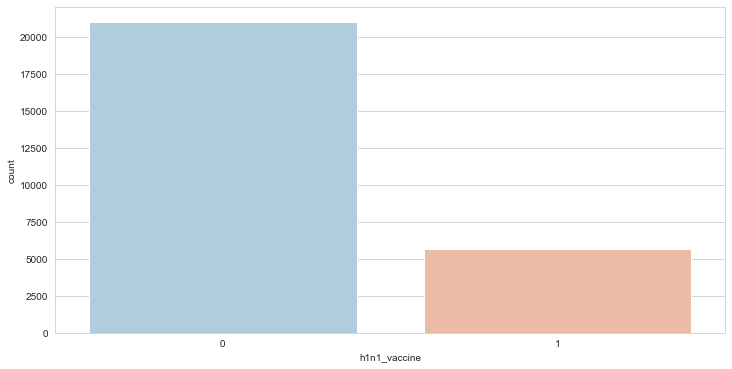

In [74]:
# vaksin h1n1
plt.figure(figsize=(12,6))
sns.set_style("whitegrid")
sns.countplot(x="h1n1_vaccine", data=train_labels, palette='RdBu_r')

Dari hasil di atas dapat diketahui bahwa ada ketidak seimbangan antara dua kategori di dalam variabel prediktor. Proporsi mereka yang tidak mendapatkan vaksin jauh lebih banyak dari yang mendapatkan vaksin. Kurang dari seperempat dari jumlah individu yang diteliti yang mendapatkan vaksin H1N1

Selanjutnya, kita akan melihat proporsi mereka yang mendapatkan vaksin flu dengan menuliskan script berikut:

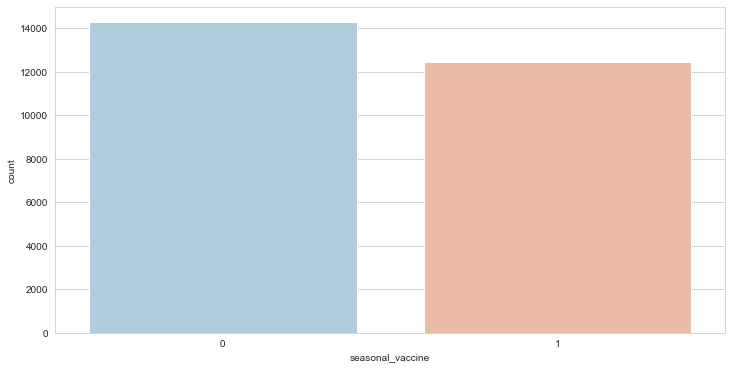

In [75]:
# vaksin flu
plt.figure(figsize=(12,6))
sns.set_style("whitegrid")
sns.countplot(x="seasonal_vaccine", data=train_labels, palette='RdBu_r')

Tampak di atas bahwa proporsi mereka yang menerima dan tidak menerima vaksin flu lebih seimbang daripada penerima vaksin H1N1. Selanjutnya, kita akan mencari tahu apakah ada korelasi antara penerima vaksin H1N1 dan vaksin flu. Apakah dapat dikatakan jika individu menerima vaksin H1N1, maka dia cenderung akan menerima vaksin flu juga. Kita akan mengetahuinya bersama.

Apakah ada korelasi antara penerima vaksin H1N1 dan penerima vaksin flu?

In [76]:
train_labels["h1n1_vaccine"].corr(train_labels["seasonal_vaccine"], method="pearson")

0.37714265306144684

Kita melihat dari hasil di atas bahwa ada korelasi ringan antara kedua variabel target ini yaitu sebesar 0.377, dimana hasil ini cukup masuk akal. Biasanya mereka yang menerima satu vaksin akan menerima vaksin yang lain. Namun kenyataannya tidak selalu demikian. Berikut ini adalah penjelasan mengenai pengaruh seorang yang menerima satu vaksin untuk mendapatkan vaksin berikutnya/kedua yang ditampilkan dalam bentuk tabel.

In [77]:
tab = pd.crosstab(train_labels["h1n1_vaccine"], train_labels["seasonal_vaccine"])

tab

seasonal_vaccine,0,1
h1n1_vaccine,,
0,13295,7738
1,977,4697


Untuk memperjelas informasi yang terkandung pada tabel di atas, mari kita ubah dalam bentuk kalimat. Dari tabel di atas seharusnya kita dapat mengetahui 

- Berapa persen individu yang mendapatkan/menerima kedua vaksin
- Berapa persen individu yang tidak menerima kedua vaksin sama sekali
- Berapa persen individu yang mendapatkan vaksin H1N1 namun tidak mendapatkan vaksin flu biasa
- Berapa persen individu yang mendapatkan vaksin flu biasa namun tidak mendapatkan vaksin H1N1

Berikut ini adalah penjelasannya:

In [78]:
print(f"Persen individu yang menerima kedua vaksin: {round(tab.iloc[1, 1] * 100/ sum(tab.sum()), 3)}%")
print(f"Person individu yang tidak menerima kedua vaksin sama sekali: {round(tab.iloc[0, 0] * 100/ sum(tab.sum()), 3)}%")
print(f"Persen individu yang mendapatkan vaksin H1N1 namun tidak mendapatkan vaksin flu biasa: {round(tab.iloc[1, 0] * 100/ sum(tab.sum()), 3)}%")
print(f"Persen individu yang mendapatkan vaksin flu biasa namun tidak mendapatkan vaksin H1N1: {round(tab.iloc[0, 1] * 100/ sum(tab.sum()), 3)}%")

Persen individu yang menerima kedua vaksin: 17.587%
Person individu yang tidak menerima kedua vaksin sama sekali: 49.781%
Persen individu yang mendapatkan vaksin H1N1 namun tidak mendapatkan vaksin flu biasa: 3.658%
Persen individu yang mendapatkan vaksin flu biasa namun tidak mendapatkan vaksin H1N1: 28.974%


Dari angka di atas, kita dapat melihat bahwa hampir setengah dari responden tidak menerima vaksin sama sekali. Proporsi yang cukup besar ada pada mereka yang mendapatkan vaksin flu biasa namun tak mendapatkan vaksin H1N1 yaitu sebesar +/- 29% dari keseluruhan responden. 

Karena ada tiga kategori yang memiliki proporsi cukup signifikan, maka kita dapat membagi data dari ketiga kategori ini dan melihat apakah ada tren dan pola yang berarti untuk menjelaskan ketiga kategori ini. Berikut adalah tiga kategori tersebut:

- Mereka yang menerima kedua vaksin
- Mereka yang tidak menerima kedia vaksin
- Mereka yang menerima vaksin flu namun tidak menerima vaksin H1N1

Pertanyaan 1: Apakah orang/mereka/individu yang memiliki anak memiliki peluang/kemungkinan lebih besar untuk mendapatkan vaksin, baik vaksin H1N1 maupun vaksin flu?

Mari kita analisa korelasi jumlah anak dengan menerima vaksin H1N1 terlebih dahulu.

In [79]:
train["household_children"].value_counts()

0.0    18672
1.0     3175
2.0     2864
3.0     1747
Name: household_children, dtype: int64

In [80]:
pd.crosstab(train['household_children'], train_labels['h1n1_vaccine'])

h1n1_vaccine,0,1
household_children,,
0.0,14689,3983
1.0,2501,674
2.0,2235,629
3.0,1398,349


In [81]:
tab = pd.crosstab(train['household_children'], train_labels['h1n1_vaccine'],
                 margins=True, normalize=True)

tab

h1n1_vaccine,0,1,All
household_children,,,
0.0,0.555182,0.150540,0.705722
1.0,0.094527,0.025474,0.120002
2.0,0.084474,0.023774,0.108247
3.0,0.052838,0.013191,0.066029
All,0.787021,0.212979,1.000000


In [82]:
tab['prop_rec_med'] = tab[1] / (tab[1] + tab[0])

In [83]:
tab

h1n1_vaccine,0,1,All,prop_rec_med
household_children,,,,
0.0,0.555182,0.150540,0.705722,0.213314
1.0,0.094527,0.025474,0.120002,0.212283
2.0,0.084474,0.023774,0.108247,0.219623
3.0,0.052838,0.013191,0.066029,0.199771
All,0.787021,0.212979,1.000000,0.212979


Kita lakukan plot terhadap tiap-tiap kategori jumlah anak, berapa proporsi dari mereka yang menerima dan tidak menerima vaksin. Agar terlihat perbedaan proporsi dari tiap-tiap kategori, kita masukkan kolom proporsi yang telah dibuat pada bagian sebelumnya.

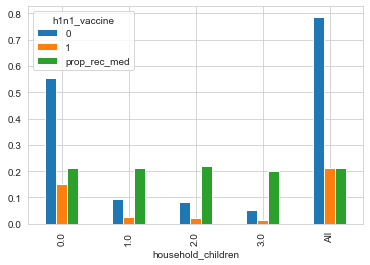

In [84]:
tab[[0,1,'prop_rec_med']].plot(kind="bar")
plt.show()

Dapat terlihat pada grafik di atas bahwa proporsi mereka yang menerima vaksin H1N1 relatif konsisten di masing-masing kategori jumlah anak pada tiap keluarga. Ini menandakan bahwa tidak ada korelasi antara mereka yang mendapatkan vaksin H1N1 dengan jumlah anak yang dimiliki.

Sekarang, kita akan menganalisa korelasi jumlah anak dengan penerima vaksin flu.

In [85]:
pd.crosstab(train['household_children'], train_labels['seasonal_vaccine'])

seasonal_vaccine,0,1
household_children,,
0.0,9217,9455
1.0,1953,1222
2.0,1769,1095
3.0,1148,599


In [86]:
tab_flu = pd.crosstab(train['household_children'], train_labels['seasonal_vaccine'],
                 margins=True, normalize=True)

tab_flu

seasonal_vaccine,0,1,All
household_children,,,
0.0,0.348363,0.357359,0.705722
1.0,0.073815,0.046186,0.120002
2.0,0.066861,0.041386,0.108247
3.0,0.043390,0.022640,0.066029
All,0.532429,0.467571,1.000000


In [87]:
tab_flu['prop_rec_med'] = tab_flu[1] / (tab_flu[1] + tab_flu[0])

In [88]:
tab_flu

seasonal_vaccine,0,1,All,prop_rec_med
household_children,,,,
0.0,0.348363,0.357359,0.705722,0.506373
1.0,0.073815,0.046186,0.120002,0.384882
2.0,0.066861,0.041386,0.108247,0.382332
3.0,0.043390,0.022640,0.066029,0.342873
All,0.532429,0.467571,1.000000,0.467571


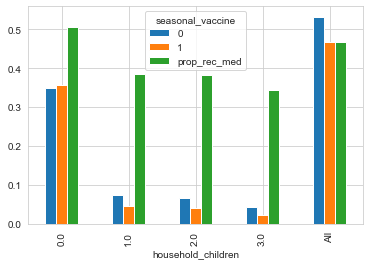

In [89]:
tab_flu[[0,1,'prop_rec_med']].plot(kind="bar")
plt.show()

Tampak dari hasil grafik di atas ini bahwa ada korelasi antara jumlah anak dan mereka yang mendapatkan vaksin. Dari pengamatan terhadap grafik, semakin sedikit anak yang dimiliki maka kemungkinan menerima vaksin juga semakin tinggi. Mereka yang memiliki anak lebih sedikit mempunyai proporsi yang lebih besar dalam penerimaan vaksin.

Dari dua hasil di atas, sangatlah aneh untuk melihat adanya perbedaan antara mereka yang menerima vaksin H1N1 dan vaksin flu, terutama mengenai tidak adanya korelasi antara jumlah anak dengan penerima vaksin H1N1. Hal ini tampak bertentangan dengan penelitian dan berita terdahulu yang memberitakan/menginformasikan bahwa seseorang akan lebih berpeluang mendapatkan vaksin jika di dalam rumah/dalam keluarga mereka ada orang-orang tua dan anak-anak, yang termasuk dalam kategori umur dengan risiko terpapar paling tinggi. Mungkin saja hasil pengamatan kita di atas dipengaruhi juga oleh variabel lain, hal yang harus kita cari tahu lebih lanjut.

Pertanyaan 2: Bagaimana rasio penerimaan vaksin terhadap umur?

Dari literatur-literatur terdahulu yang meneliti kelompok umur mana saja yang diutamakan mendapatkan vaksin, maka orang-orang tua termasuk dalam kategori mereka yang diutamakan untuk mendapatkan vaksin, dibandingkan dengan kelompok umur lainnya. Semakin tua seseorang, semakin berpeluang besar untuk menerima vaksin.

Mari kita lakukan analisa korelasi antara umur dan kemungkinan menerima vaksin. Namun, hasil ini mungkin tidak bisa langsung disimpulkan begitu saja karena mungkin saja ada variabel-variabel lain yang mempengaruhi, seperti kondisi/penyakit bawaan dan faktor-faktor lainnya.

Mari kita lakukan analisa terhadap vaksin H1N1 terlebih dahulu.

In [90]:
pd.crosstab(train['age_group'], train_labels['h1n1_vaccine'])

h1n1_vaccine,0,1
age_group,,
18 - 34 Years,4224,991
35 - 44 Years,3087,761
45 - 54 Years,4218,1020
55 - 64 Years,4212,1351
65+ Years,5292,1551


In [91]:
tab_age_h1n1 = pd.crosstab(train['age_group'], train_labels['h1n1_vaccine'],
                          margins=True, normalize=True)

In [92]:
tab_age_h1n1

h1n1_vaccine,0,1,All
age_group,,,
18 - 34 Years,0.158161,0.037106,0.195267
35 - 44 Years,0.115588,0.028494,0.144082
45 - 54 Years,0.157936,0.038192,0.196128
55 - 64 Years,0.157711,0.050586,0.208297
65+ Years,0.198150,0.058075,0.256225
All,0.787546,0.212454,1.000000


In [93]:
tab_age_h1n1['prop_rec_med'] = tab_age_h1n1[1] / (tab_age_h1n1[1] + tab_age_h1n1[0])

In [94]:
tab_age_h1n1

h1n1_vaccine,0,1,All,prop_rec_med
age_group,,,,
18 - 34 Years,0.158161,0.037106,0.195267,0.190029
35 - 44 Years,0.115588,0.028494,0.144082,0.197765
45 - 54 Years,0.157936,0.038192,0.196128,0.194731
55 - 64 Years,0.157711,0.050586,0.208297,0.242855
65+ Years,0.198150,0.058075,0.256225,0.226655
All,0.787546,0.212454,1.000000,0.212454


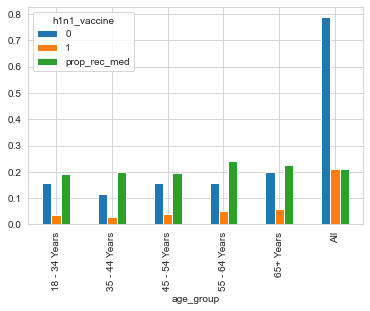

In [95]:
tab_age_h1n1[[0,1,'prop_rec_med']].plot(kind="bar")
plt.show()

Dari grafik di atas tampak bahwa kategori umur tidak memiliki pengaruh terhadup kemungkinan seseorang menerima vaksin. Di setiap kategori, proporsi penerima vaksin tampak datar di angka 20-25%.

Mari kita bandingkan dengan analisa terhadap vaksin flu.

In [96]:
pd.crosstab(train['age_group'], train_labels['seasonal_vaccine'])

seasonal_vaccine,0,1
age_group,,
18 - 34 Years,3731,1484
35 - 44 Years,2453,1395
45 - 54 Years,3136,2102
55 - 64 Years,2719,2844
65+ Years,2233,4610


In [97]:
tab_age_flu = pd.crosstab(train['age_group'], train_labels['seasonal_vaccine'],
                          margins=True, normalize=True)

In [98]:
tab_age_flu

seasonal_vaccine,0,1,All
age_group,,,
18 - 34 Years,0.139701,0.055566,0.195267
35 - 44 Years,0.091849,0.052233,0.144082
45 - 54 Years,0.117422,0.078706,0.196128
55 - 64 Years,0.101809,0.106489,0.208297
65+ Years,0.083611,0.172614,0.256225
All,0.534392,0.465608,1.000000


In [99]:
tab_age_flu['prop_rec_med'] = tab_age_flu[1] / (tab_age_flu[1] + tab_age_flu[0])

In [100]:
tab_age_flu

seasonal_vaccine,0,1,All,prop_rec_med
age_group,,,,
18 - 34 Years,0.139701,0.055566,0.195267,0.284564
35 - 44 Years,0.091849,0.052233,0.144082,0.362526
45 - 54 Years,0.117422,0.078706,0.196128,0.401298
55 - 64 Years,0.101809,0.106489,0.208297,0.511235
65+ Years,0.083611,0.172614,0.256225,0.673681
All,0.534392,0.465608,1.000000,0.465608


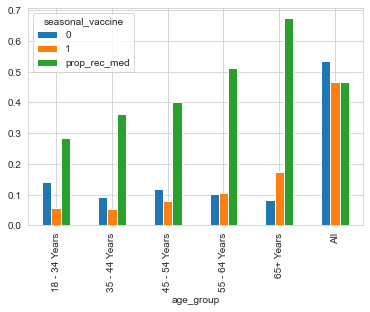

In [101]:
tab_age_flu[[0,1,'prop_rec_med']].plot(kind="bar")
plt.show()

Seperti pada grafik yang menunjukkan pola penerimaan vaksin yang dikategorikan berdasarkan jumlah anak di dalam satu keluarga, dimana ada relasi antara jumlah anak dengan kemungkinan menerima vaksin flu, maka pada kategori umur juga didapati relasi terhadap penerima vaksin flu. Semakin tua seorang individu, maka semakin berpeluang ia untuk menerima vaksin flu, relasi yang tidak kita temukan pada penerima vaksin H1N1. 

Temuan ini menarik karena pada dua variabel yang kita eksplorasi bersama, korelasi/relasi selalu hanya ditemukan  pada penerima vaksin flu, namun tidak ditemukan pada penerima vaksin H1N1. 

Pertanyaan 3: Mampukah kita melihat melalui diagram batang mengenai hubungan antar variabel pada kolom data dengan kemungkinan menerima vaksin yang diseleksi/dipilih berdasarkan penelitian sebelumnya mengenai faktor-faktor pendorong pertumbuhan rasio vaksinasi?

Untuk mempermudah dalam melakukan analisa terhadap beberapa variabel, maka kita lakukan langkah pertama yaitu 'inner join' terhadap data train dan data label, dengan kunci join berada pada kolom 'respondent_id', yang dimiliki oleh kedua tabel.

In [102]:
# langkah 1: melakukan join terhadap data label dan data train

df_joined = train.join(train_labels, on=["respondent_id"], how = "inner", rsuffix="_")

In [103]:
df_joined.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,respondent_id_,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,1,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,2,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,3,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,4,0,0


In [104]:
# langkah 2: membuat fungsi untuk menciptakan plot rasio vaksinasi berdasarkan kolom pada data training

def vaccination_rate_plot(col,target,ax=None):
    counts = pd.crosstab(df_joined[col], df_joined[target])
    group_counts = counts.sum(axis="columns")
    props = counts.div(group_counts, axis="index")
    props.plot(kind="barh",stacked=True,ax=ax)
    ax.invert_yaxis()
    ax.legend().remove()
    

Dari beberapa penelitian dan berita yang penuliskan kumpulkan, berikut ini adalah 10 faktor yang berhubungan/memiliki relasi/memiliki korelasi dengan/terhadap kemungkinan/rasio seseorang mendapatkan vaksin flu.

1. Umur
2. Jenis Kelamin
3. Pendidikan
4. Derajat kekhawatiran terhadap virus/derajat kepedulian terhadap virus
5. Derajat keawasan/kesadaran terhadap virus
6. Apakah dokter merekomendasikan vaksin
7. Apakah memiliki penyakit bawaan/penyakit kronis
8. Apakah ada riwayat kontak dengan anak kecil/balita? (karena anak kecil memilik risiko tinggi)
9. Pendapat mereka tentang vaksin (apakah vaksin bekerja? apakah berisiko? apakah vaksin membuat mereka sakit?)
10. Apakah mereka pekerja medis (atau berada di bidang medis).

Sekarang, kita akan memasukkan ke-10 kolom yang merupakan faktor terbesar dari kemungkinan menerima vaksin berdasarkan sejumlah penelitian ke dalam list. List ini nantinya akan kita lakukan loop untuk membuat plot dari proporsi rasio vaksin seluruh variabel yang ada di dalam list.

In [105]:
df_joined

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,respondent_id_,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,1,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,2,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,3,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN,26702,0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,26703,0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN,26704,0,1
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg,26705,0,0


In [106]:
# masukkan kolom objek penelitian ke dalam list

cols_to_loop = ["h1n1_concern", "h1n1_knowledge", "doctor_recc_h1n1",
               "doctor_recc_seasonal","chronic_med_condition","child_under_6_months",
               "opinion_h1n1_vacc_effective","opinion_h1n1_risk","opinion_h1n1_sick_from_vacc",
               "opinion_seas_vacc_effective","opinion_seas_risk","opinion_seas_sick_from_vacc",
               "age_group","education","sex","income_poverty"]

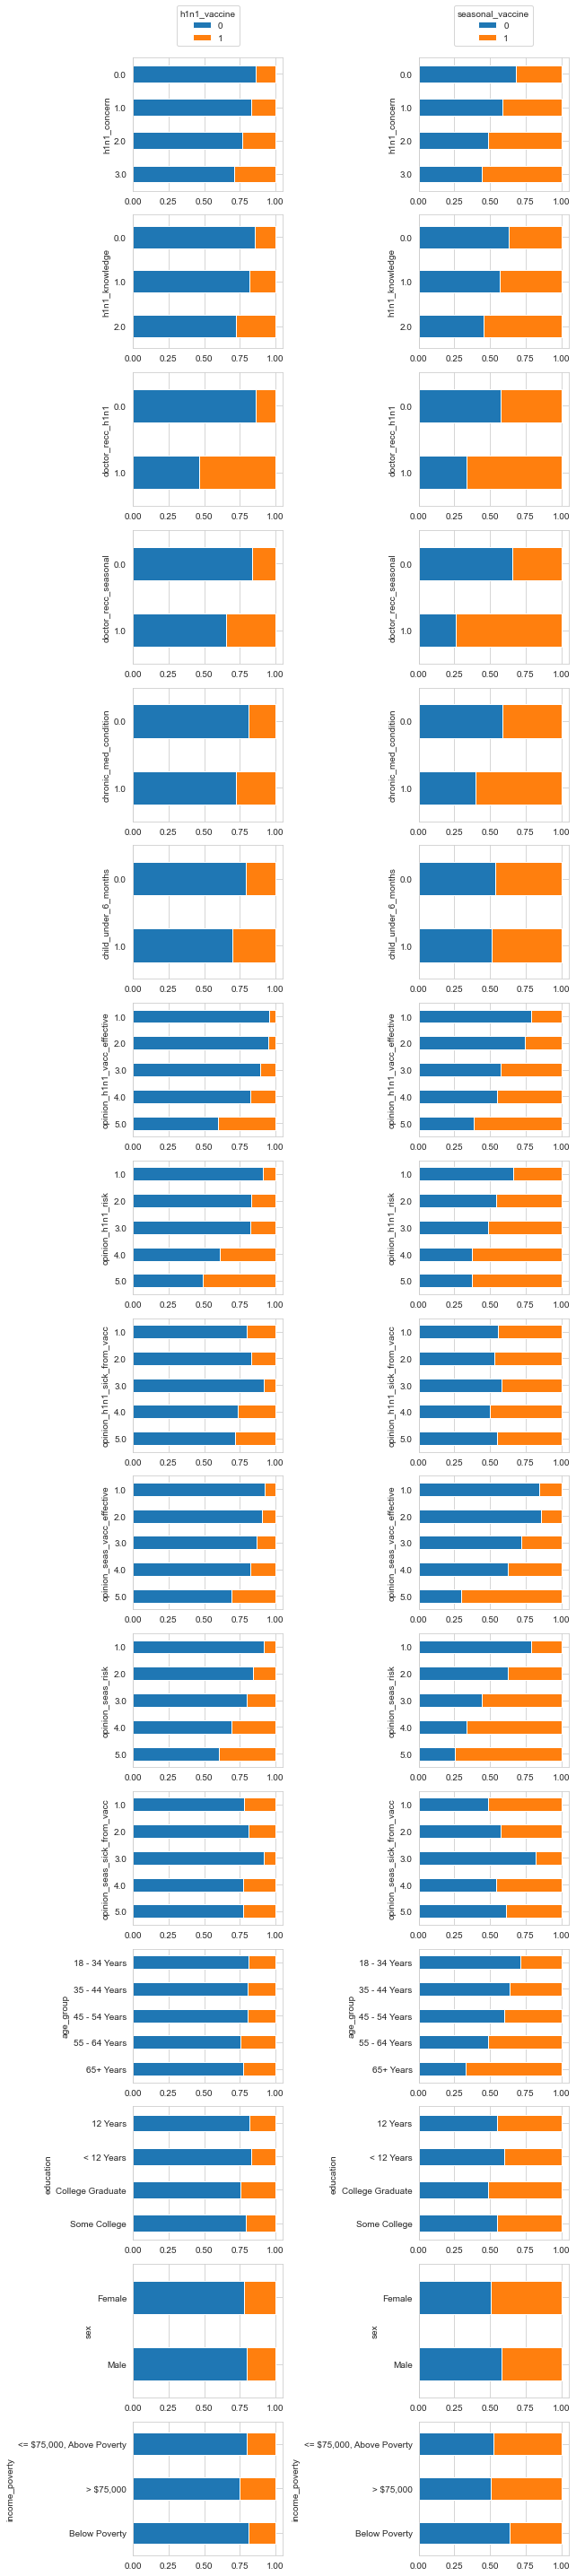

In [107]:
# melakukan pengaturan terhadap plot dana axis

fig,ax = plt.subplots(len(cols_to_loop),2,figsize=(9,len(cols_to_loop)*2.5))

# melakukan iterasi/loop terhadap seluruh kolom

for index, col in enumerate(cols_to_loop):
    # buat plot pertama sebagai plot H1N1
    vaccination_rate_plot(col, "h1n1_vaccine", ax=ax[index,0])
    # buat plot kedua sebagai plot flu
    vaccination_rate_plot(col, "seasonal_vaccine", ax=ax[index,1])
    # atur labels
    ax[0,0].legend(loc="lower center", bbox_to_anchor=(0.5,1.05),
                  title="h1n1_vaccine")
    
    ax[0,1].legend(loc="lower center", bbox_to_anchor=(0.5,1.05),
                  title="seasonal_vaccine")
    # pengaturan agar layoutnya rapat
    fig.tight_layout()

Dari plot di atas, kita mengamati hal-hal berikut:

Berikut ini adalah faktor-faktor yang menurut pengamatan plot memiliki korelasi terhadap kemungkinan menerima vaksin/rasio penerimaan vaksin yang tinggi (bahkan dengan korelasi yang cukup signifikan) H1N1. Analisa secara statistik yang lebih dalam dapat mengkonfirmasi hal ini. 

1. Tingginya perhatian terhadap H1N1
2. Tingginya pengetahuan tentang H1N1
3. Jika dokter yang memeriksa mereka merekomendasikan vaksin H1N1 kepada individu, maka setengah dari mereka akan menerima vaksin H1N1.
4. Jika dokter merekomendasikan vaksin flu
5. Jika mereka punya penyakit kronis bawaan
6. Jika mereka punya anak kecil di bawah 6 bulan
7. Jika mereka punya opini positif terhadap vaksin H1N1
8. Jika mereka punya opini positif terhadap risiko terkena penyakit jika tidak mendapatkan vaksin H1N1
9. Jika mereka berpendapat bahwa vaksin flu efektif
10. Jika mereka berpendapat bahwa tanpa vaksin flu, risiko terkena penyakit semakin besar

Untuk vaksin flu, maka faktor-faktor berikut adalah yang memiliki korelasi tinggi terhadap penerimaan vaksin.

1. Naiknya perhatian terhadap H1N1
2. Naiknya pengetahuan tentang H1N1
3. Dokter merekomendasikan vaksin H1N1
4. Dokter merekomendasikan vaksin flu (korelasi tinggi)
5. Punya penyakit kronis bawaan (korelasi tinggi)
6. Berpendapat bahwa vaksin H1N1 efektif
7. Berpendapat bahwa risiko tertular penyakit tinggi tanpa vaksin H1N1
8. Berpendapat bahwa vaksin flu efektif (korelasi tinggi)
9. Berpendapat bahwa risiko tertular penyakit tinggi tanpa vaksin flu
10. Umur: semakin tua individu, penerimaan vaksin flu meningkat
11. Pendidikan (korelasi sedang - lulusan sarjana memiliki penerimaan yang lebih tinggi)
12. Pendapatan (korelasi sedang - di bawah garis kemiskinan memiliki kemungkinan kecil menerima vaksin)

Secara umum, kita berhasil mengamati hal-hal berikut:

1. Kita harus mendalami lebih jauh mengenai kemungkinan terjadinya kolinearitas (contoh: apakah individu yang menerima rekomendasi dokter untuk mendapatkan vaksin H1N1 juga menerima rekomendasi untuk mendapatkan vaksin flu)
2. Pendapat individu mengenai a)berbahayanya virus b)efektivitas vaksin dan c)kebutuhan mereka terhadap vaksin nampak merupakan faktor prediktor yang tinggi/kuat terhadap kemungkinan menerima vaksin
3. Faktor demografis, secara garis besar, tidak mempengaruhi/memiliki korelasi terhadap rasio penerimaan vaksin
4. Umur berhasil memprediksi kemungkinan mendapatkan vaksin flu (semakin tua individu, peluang mendapatkan vaksin flu semakin besar), namun korelasi ini tidak berlaku pada vaksin H1N1.


Pertanyaan 4: Bagaimana kovariat/variabel memiliki relasi satu dengan yang lain? (koleniaritas)

Setelah memahami korelasi antara variabel prediktor dengan variabel target, maka kita akan mengamati bagaimana korelasi antar sesama variabel prediktor.

In [108]:
# mengambil kolom dengan tipe data numerik
numeric_cols = [col for col in train.columns if train[col].dtype == "float64"]

In [109]:
# mengambil beberapa porsi data untuk data training
numeric_training_data = train.loc[:, numeric_cols]

In [110]:
# membuat matriks korelasi
corr_matrix = numeric_training_data.corr()

In [111]:
# Berapa angka korelasi maksimal-nya (di luar diagonal)
np.max(np.tril(corr_matrix, k=-1))

0.5918676633641384

In [112]:
# Gambarkan korelasi dalam bentuk segitiga
mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool))

TypeError: object of type <class 'float'> cannot be safely interpreted as an integer.

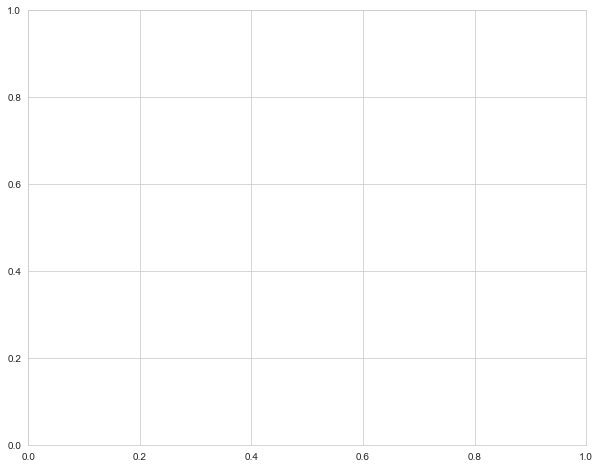

In [113]:
# pengaturan terhadap grafik matplotlib
fig, ax = plt.subplots(figsize=(10,8))

# Buat pemetaan warna yang menunjukkan perbedaan
cmap = sns.diverging_palette(220,10,as_cmap=True)

# Gambar peta panas dengan mask dan warna yang sudah diatur
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, center =0,
           square=True, linewidths=.5, cbar_kws={"shrink":.5})
plt.show()

Ada beberapa hal yang dapat kita simpulkan sementara dari grafik di atas:

1. Seperti yang telah diduga sebelumnya, kovariasi/relasi antara/koleniaritas antara pendapat individu mengenai manjurnya/efektifnya vaksin cukup tinggi (punya korelasi yang kuat)

2. Yang mengejutkan adalah korelasi lemah antara jumlah anak di dalam satu keluarga dengan penanganan terhadap virus - penelitian terdahulu menyimpulkan bahwa jika suatu keluarga memiliki jumlah anak yang lebih banyak, mereka akan lebih mendukung program vaksin karena mereka sadar anak-anak mereka memiliki ancaman tertular yang besar.

3. Meskipun korelasi lemah pada variabel jumlah anak, namun pada variabel anak di bawah 6 bulan (child_under_6_months), korelasinya menunjukkan positif terhadap hampir seluruh variabel, menunjukkan bahwa jika ada anak kecil di satu rumah/satu keluarga, orang-orang dewasanya akan lebih berpeluang menerima vaksin. Penjelasannya mungkin dikarenakan ketika anak-anak ini sudah memiliki umur yang cukup/sudah tidak balita lagi, orang tuanya berpikir bahwa si anak sudah tidak riskan terkena virus, namun ketika anaknya masih sangat belia, orang tuanya akan menjadi lebih khawatir.

Pertanyaan 5: Bagaimana model awal dari tantangan ini dan mana variabel yang memiliki pengaruh besar terhadap variabel target?

Setelah melihat hubungan antara sesama variabel prediktor dalam bentuk grafik dan juga hubungan antara variabel prediktor dan variabel, maka kita akan membuat model sederhana / model awal yang akan memberi kita informasi penting mengenai mana saja variabel yang memiliki paling besar terhadap variabel prediktor. Mana variabel yang lebih penting dan mana variabel yang dapat diabaikan. Kita dapat menggunakan model logistic regression dalam pembuatan model karena kita melakukan prediksi terhadap variabel target yang mempunyai tipe data binary (antara 0 dan 1). 

Variabel yang akan kita masukkan pada model hanya variabel yang bertipe numerik, agar kita tak perlu melakukan one hot encoding pada variabel dengan tipe object/character. Tujuan utama dari model awal ini adalah untuk melihat mana variabel yang kira-kira memiliki pengaruh terbesar, dan berdasarkan analisa sebelumnya, kita mengetahui bahwa variabel bertipe numerik-lah yang memiliki hubungan cukup kuat dengan variabel target untuk memprediksi penerimaan vaksin.

Sebelum membuat model, kita akan mengganti data yang kosong (NA) dengan nilai tengah (median) dari masing-masing kolom

In [114]:
# memeriksa nilai NA
numeric_training_data.isnull().sum()

h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
household_adults                 249
household_children               249
dtype: int64

In [115]:
# memotong nilai yang kosong (impute) dengan median

imputed_train = SimpleImputer(missing_values = np.nan,
                             strategy = "median")

# melakukan fit objek imputer terhadap data train

train_num_imp = pd.DataFrame(imputed_train.fit_transform(numeric_training_data),
                            columns = numeric_training_data.columns)

In [116]:
# membuat objek/model regresi logistik

h1n1_model = LogisticRegression()
seasonal_model = LogisticRegression()

In [117]:
# melakukan fit terhadap model

h1n1_model.fit(train_num_imp, train_labels['h1n1_vaccine'])
seasonal_model.fit(train_num_imp, train_labels['seasonal_vaccine'])

c:\users\faris\anaconda3\envs\mytfenv_udemy\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\faris\anaconda3\envs\mytfenv_udemy\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Setelah membuat model, kita akan mencari tahu mana variabel yang memiliki pengaruh terbesar pada model regresi logistik dari vaksin H1N1 dan vaksin flu.

In [118]:
h1n1_model.coef_

array([[-9.62887379e-02,  1.54189794e-01,  1.16737884e-01,
        -3.99103800e-02,  1.72279771e-01, -6.47165942e-03,
        -1.98043050e-01, -3.02626112e-02,  3.46898273e-02,
         1.96815614e+00, -4.11624406e-01,  1.09698257e-01,
         2.03827202e-01,  7.32284943e-01,  2.97160713e-01,
         6.03304926e-01,  3.48549645e-01, -1.75072083e-02,
         9.95638596e-02,  1.49235541e-01, -8.88699075e-02,
        -1.71929076e-03, -1.05249764e-01]])

In [119]:
# Menyamakan koefisien variabel kepada variabel-nya masing-masing

feature_dict = dict(zip(numeric_training_data.columns, list(h1n1_model.coef_[0])))

In [120]:
feature_dict

{'h1n1_concern': -0.09628873789430335,
 'h1n1_knowledge': 0.15418979390042561,
 'behavioral_antiviral_meds': 0.11673788416052219,
 'behavioral_avoidance': -0.03991037999151154,
 'behavioral_face_mask': 0.17227977058868327,
 'behavioral_wash_hands': -0.006471659417328721,
 'behavioral_large_gatherings': -0.1980430502101246,
 'behavioral_outside_home': -0.03026261119079437,
 'behavioral_touch_face': 0.034689827291320814,
 'doctor_recc_h1n1': 1.9681561391440128,
 'doctor_recc_seasonal': -0.41162440633537484,
 'chronic_med_condition': 0.10969825684004446,
 'child_under_6_months': 0.20382720244519206,
 'health_worker': 0.7322849429996692,
 'health_insurance': 0.2971607133498883,
 'opinion_h1n1_vacc_effective': 0.603304925845375,
 'opinion_h1n1_risk': 0.3485496449237933,
 'opinion_h1n1_sick_from_vacc': -0.01750720831812673,
 'opinion_seas_vacc_effective': 0.09956385955862924,
 'opinion_seas_risk': 0.14923554067235437,
 'opinion_seas_sick_from_vacc': -0.08886990751750817,
 'household_adults':

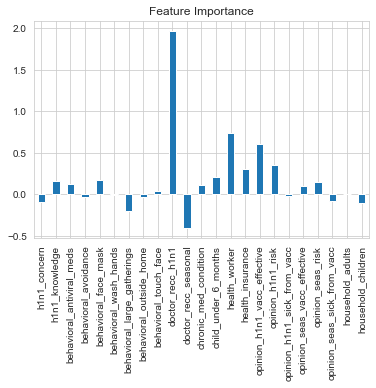

In [121]:
# Visualisasi variabel paling berpengaruh

feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

In [122]:
seasonal_model.coef_

array([[ 0.03600025,  0.1836742 , -0.06917695, -0.04368537,  0.01508583,
         0.0684763 ,  0.0052587 , -0.02430976,  0.24837293, -0.33753823,
         1.54451357,  0.34284607, -0.02750328,  0.68859112,  0.90378238,
         0.00322608,  0.00462562, -0.06856604,  0.5901782 ,  0.51428204,
        -0.22196777, -0.11832277, -0.24183171]])

In [123]:
# Menyamakan koefisien variabel kepada variabel-nya masing-masing

feature_dict_flu = dict(zip(numeric_training_data.columns, list(seasonal_model.coef_[0])))

In [124]:
feature_dict_flu

{'h1n1_concern': 0.036000253392089156,
 'h1n1_knowledge': 0.18367420382266508,
 'behavioral_antiviral_meds': -0.06917695210763049,
 'behavioral_avoidance': -0.0436853700517311,
 'behavioral_face_mask': 0.01508583166808891,
 'behavioral_wash_hands': 0.06847630173332885,
 'behavioral_large_gatherings': 0.005258699455663123,
 'behavioral_outside_home': -0.024309761861037386,
 'behavioral_touch_face': 0.24837292739528236,
 'doctor_recc_h1n1': -0.33753823016942885,
 'doctor_recc_seasonal': 1.5445135660177702,
 'chronic_med_condition': 0.3428460700174067,
 'child_under_6_months': -0.0275032837299713,
 'health_worker': 0.6885911171800387,
 'health_insurance': 0.9037823793955142,
 'opinion_h1n1_vacc_effective': 0.003226084853626118,
 'opinion_h1n1_risk': 0.004625623268911835,
 'opinion_h1n1_sick_from_vacc': -0.06856604497868866,
 'opinion_seas_vacc_effective': 0.5901781959335721,
 'opinion_seas_risk': 0.5142820380012871,
 'opinion_seas_sick_from_vacc': -0.22196776800336723,
 'household_adults'

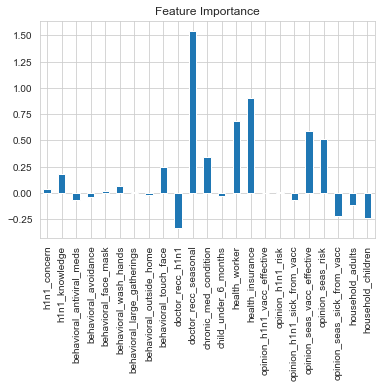

In [125]:
# Visualisasi variabel paling berpengaruh

feature_df_flu = pd.DataFrame(feature_dict_flu, index=[0])
feature_df_flu.T.plot.bar(title="Feature Importance", legend=False);

In [126]:
# bagaimana pendapat setiap individu mengenai risiko flu berhubungan dengan rekomendasi dokter untuk menerima vaksin

pd.crosstab(train['doctor_recc_seasonal'], train['opinion_seas_risk'], margins = True,
           normalize = "index")

opinion_seas_risk,1.0,2.0,3.0,4.0,5.0
doctor_recc_seasonal,,,,,
0.0,0.274085,0.373388,0.024687,0.246066,0.081775
1.0,0.135767,0.274659,0.025128,0.386798,0.177647
All,0.228370,0.340757,0.024833,0.292579,0.113462


In [127]:
pd.crosstab(train["doctor_recc_seasonal"], train["opinion_seas_vacc_effective"], margins = True,
           normalize = "index")

opinion_seas_vacc_effective,1.0,2.0,3.0,4.0,5.0
doctor_recc_seasonal,,,,,
0.0,0.054532,0.100499,0.056565,0.475199,0.313205
1.0,0.029173,0.049869,0.022067,0.380626,0.518265
All,0.046144,0.083753,0.045155,0.443918,0.381031


Kesimpulan:

Setelah membuat grafik mengenai faktor yang baling berpengaruh pada pembuatan model, kita mendapati kesimpulan yang serupa antara dua model vaksin H1N1 dan vaksin flu musiman. Sejauh ini variabel yang paling berpengaruh dari dua model yang kita buat adalah rekomendasi dari dokter. Rekomendasi ini juga memiliki korelasi dengan bagaimana setiap individu memberikan opininya terhadap risiko  virus terhadap dirinya dan efektivitas vaksin flu musiman (meskipun belum tentu ada kausalitas / nampaknya tidak ada kausalitas). Dari tabel dan grafik yang dibuat mengenai relasi antara rekomendasi dokter dan opini, lebih mudahnya kita bisa menyimpulkannya dalam bentuk kalimat sebagai "jika dokter merekomendasikan vaksin flu musiman, individu/partisipan/responden akan lebih percaya bahwa mereka mempunyai risiko tinggi untuk terpapar virus dan jatuh sakit, membuat mereka berpikir bahwa vaksin akan lebih efektif pada mereka."

Ada dua variabel yang menarik dan dapat dikadi lebih jauh yaitu mengenai pekerja medis dan orang yang memiliki asuransi kesehatan. Nampaknya dua variabel tersebut memiliki korelasi positif yang cukup kuat terhadap kemungkinan menerima vaksin.

Mari kita lihat hubungan variabel target dengan mereka yang memiliki asuransi kesehatan:

In [128]:
pd.crosstab(train["health_insurance"], train_labels["seasonal_vaccine"], margins=True,
           normalize="index")

seasonal_vaccine,0,1
health_insurance,,
0.0,0.770737,0.229263
1.0,0.461999,0.538001
All,0.499134,0.500866


In [129]:
train["health_insurance"].value_counts()

1.0    12697
0.0     1736
Name: health_insurance, dtype: int64

In [130]:
pd.crosstab(train["health_worker"], train_labels["seasonal_vaccine"],margins=True,
           normalize="index")

seasonal_vaccine,0,1
health_worker,,
0.0,0.554382,0.445618
1.0,0.352880,0.647120
All,0.531830,0.468170


In [131]:
train["health_worker"].value_counts()

0.0    23004
1.0     2899
Name: health_worker, dtype: int64

In [132]:
pd.crosstab(train["health_worker"], train_labels["seasonal_vaccine"])

seasonal_vaccine,0,1
health_worker,,
0.0,12753,10251
1.0,1023,1876


Kita dapat melihat bahwa proporsi dari pekerja medis tidak seimbang ketika dihubungkan/direlasikan dengan kemungkinan menerima vaksin flu musiman, yang disebut dalam istilah statistik sebagai skewed. Ada 88% responden yang memiliki asuransi kesehatan, dari responden yang memiliki asuransi kesehatan, 11% responden adalah pekerja medis. Kita dapat melakukan tes statistik / pemeriksaan statistik untuk melihat apakah perbedaan ini signifikan ataukah tidak melalui metode tes chi square.

Hipotesa awal / perkiraan awal adalah asumsi bahwa menerima vaksin flu musiman tidak memiliki relasi / berhubungan dengan apakah seseorang itu memiliki asuransi kesehatan atau apakah seseorang itu merupakan pekerja medis. Karenanya, kita menentukan nilai yang diharapkan sebesar 0.5 proporsi individual setiap kolom / barisnya. Sebagai contoh, jiks 10% pekerja medis, kita menganggap/berharap/memprediksi nilai 0.5 (angka total dari partisipan) individu akan mendapatkan vaksin. Kita berasumsi sama / serupa untuk individu yang tidak mendapatkan vaksin, karena kita memiliki asumsi bahwa kemungkinan seseorang mendapatkan vaksin tidak tergantung dari statusnya.

Mari kita mulai melihat pengamatan kita terhadap variabel asuransi kesehatan dan relasinya dengan kemungkinan menerima vaksin.

In [133]:
# observasi aktual

pd.crosstab(train["health_insurance"], train_labels["seasonal_vaccine"])

seasonal_vaccine,0,1
health_insurance,,
0.0,1338,398
1.0,5866,6831


In [134]:
# hasil yang diharapkan
expected_counts_health_insurance = [[0.5 * (train['health_insurance'].value_counts()[0] / train['health_insurance'].value_counts().sum()) * train['health_insurance'].value_counts().sum(), 
                                     0.5 * (train['health_insurance'].value_counts()[0] / train['health_insurance'].value_counts().sum()) * train['health_insurance'].value_counts().sum()], 
                                    [0.5 * (train['health_insurance'].value_counts()[1] / train['health_insurance'].value_counts().sum()) * train['health_insurance'].value_counts().sum(), 
                                     0.5 * (train['health_insurance'].value_counts()[1] / train['health_insurance'].value_counts().sum()) * train['health_insurance'].value_counts().sum()]]
print(expected_counts_health_insurance)

[[868.0, 868.0], [6348.5, 6348.5]]


In [135]:
# bagaimana relasi/hubungan asuransi kesehatan dengan kemungkinan menerima vaksin flu musiman

scipy.stats.chisquare(pd.crosstab(train["health_insurance"],
                                 train_labels["seasonal_vaccine"]),
                     f_exp=expected_counts_health_insurance)

Power_divergenceResult(statistic=array([291.16415159, 291.16415159]), pvalue=array([2.77268124e-65, 2.77268124e-65]))

Sekarang kita lihat variabel status individu sebagai pekerja medis dan hubungannya dengan kemungkinan menerima vaksin flu musiman.

In [136]:
# observasi aktual

pd.crosstab(train["health_worker"], train_labels["seasonal_vaccine"])

seasonal_vaccine,0,1
health_worker,,
0.0,12753,10251
1.0,1023,1876


In [137]:
# hasil yang diharapkan

expected_counts_health_worker = [[0.5 * (train['health_worker'].value_counts()[0] / train['health_worker'].value_counts().sum()) * train['health_worker'].value_counts().sum(), 
                                  0.5 * (train['health_worker'].value_counts()[0] / train['health_worker'].value_counts().sum()) * train['health_worker'].value_counts().sum()], 
                                 [0.5 * (train['health_worker'].value_counts()[1] / train['health_worker'].value_counts().sum()) * train['health_worker'].value_counts().sum(), 
                                  0.5 * (train['health_worker'].value_counts()[1] / train['health_worker'].value_counts().sum()) * train['health_worker'].value_counts().sum()]]
print(expected_counts_health_worker)

[[11502.0, 11502.0], [1449.5, 1449.5]]


In [138]:
# bagaimana relasi/hubungan status sebagai pekerja medis dengan kemungkinan menerima vaksin flu musiman

scipy.stats.chisquare(pd.crosstab(train["health_worker"],
                                 train_labels["seasonal_vaccine"]),
                     f_exp = expected_counts_health_worker)

Power_divergenceResult(statistic=array([261.55648135, 261.55648135]), pvalue=array([7.85677282e-59, 7.85677282e-59]))

Catatan : 

Dengan dibantu oleh tes chi-square, kita melihat bahwa memiliki asuransi kesehatan atau berstatus sebagai pekerja medis secara signifikan berpengaruh/memiliki pengaruh terhadap kemungkinan menerima vaksin flu musiman (tapi hal ini tidak menunjukkan ke arah mana pendulum probabilitas itu mengarah, tetapi menunjukkan bahwa setidaknya ada hubungan yang signifikan). Dari melihat tabel di atas, kita mengamati bahwa jika suatu individu tidak memiliki asuransi kesehatan, mereka akan lebih kecil peluangnya untuk menerima vaksin flu musiman (dan jika mereka memiliki asuransi kesehatan, mereka akan lebih berpeluang menerima vaksin). Kita juga mengamati bahwa jika suatu individu bukan berstatus sebagai pekerja medis, mereka akan lebih kecil peluangnya menerima vaksin (tetapi jika mereka berstatus sebagai pekerja medis, akan berpeluang lebih besar dalam menerima vaksin).

Informasi ini seakan mencoba mengisyaratkan bahwa mungkin salah satu cara untuk mempromosikan / mengkampanyekan vaksin flu musiman adalah dengan menyediakan akses yang lebih mudah untuk menerima vaksin bagi mereka yang tidak memiliki asuransi kesehatan.

Tapi, apakah hasil di atas dapat juga berarti bahwa individu yang tidak memiliki asuransi kesehatan akan jarang menemui/bertemu dengan dokter? Kita tidak memiliki pertanyaan yangs secara langsung menjawab ini, namun kita dapat berhipotesa bahwa hal ini dapat menjelaskan observasi yang kita lakukan.

Artikel di bawah ini tampaknya menyimpulkan bahwa, sebagaimana yang kita duga, individu dengan tanpa asuransi kesehatan akan lebih jarang menemui dokter.

1. https://www.kff.org/uninsured/issue-brief/key-facts-about-the-uninsured-population/
2. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4351276/

Karenanya, saya memiliki dugaan/menduga bahwa jika individu dengan tanpa asuransi kesehatan dapat menemui dokter, mereka akan lebih berpeluang untuk menerima vaksin flu musiman (jika akses terhadap dokter masih dapat mereka jangkau, yang mana hal ini merupakan kerumitan yang mesti dipertimbangkan pula). Hipotesa awal saya akan seperti ini bunyinya, "dampak observasi yang telah kita lakukan (yaitu individu dengan asuransi kesehatan akan lebih kecil peluangnya menerima vaksin flu musiman) akan berpeluang besar menerima vaksin jika mereka didorong dan diberikan kesempatan untuk menjumpai dokter.

Pada tabel di bawah, kita melihat bahwa individu yang tak memiliki asuransi kesehatan dan disarankan untuk menerima vaksin flu musiman hanya 19% dari keseluruhan. Sementara individu yang memiliki asuransi disarankan untuk menerima vaksin flu musiman sebesar 37% dari keseluruhan. 

Pengecualian terhadap ukuran-ukuran semacam kondisi kesehatan, tampaknya satu-satunya perbedaan yang relevan antara dua kelompok ini adalah mereka yang tak memiliki asuransi kesehatan akan memiliki peluang lebih kecil untuk menemui dokter.

In [139]:
pd.crosstab(train["health_insurance"], train["doctor_recc_seasonal"], normalize="index")

doctor_recc_seasonal,0.0,1.0
health_insurance,,
0.0,0.805539,0.194461
1.0,0.634497,0.365503


In [140]:
for col in ['opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc']:
    print("======================")
    print(f"Now printing cross-table for the following column: {col}")
    print(pd.crosstab(train['health_worker'],  train[col], normalize = 'index'))

Now printing cross-table for the following column: opinion_seas_vacc_effective
opinion_seas_vacc_effective       1.0       2.0       3.0       4.0       5.0
health_worker                                                                
0.0                          0.046816  0.084531  0.047731  0.443298  0.377624
1.0                          0.035579  0.078411  0.024870  0.448014  0.413126
Now printing cross-table for the following column: opinion_seas_risk
opinion_seas_risk       1.0       2.0       3.0       4.0       5.0
health_worker                                                      
0.0                0.232564  0.351981  0.026165  0.282368  0.106922
1.0                0.183293  0.264066  0.017259  0.369348  0.166034
Now printing cross-table for the following column: opinion_seas_sick_from_vacc
opinion_seas_sick_from_vacc       1.0       2.0       3.0       4.0       5.0
health_worker                                                                
0.0                          0.44

Melalui analisa secara singkat, tampak bahwa pekerja medis lebih memiliki keyakinan kuat bahwa vaksin flu musiman efektif dan akan mereka akan memiliki risiko tinggi jika mereka tak menerima vaksin, tetapi hasilnya tidak akan signifikan jika ditimbang dari segi statistik. Faktor ini kemungkinan tidak akan menjelaskan mengapa pekerja medis secara signifikan lebih berpeluang menerima vaksin flu musiman ketimbang pekerja non-medis.

Analisa lebih jauh mengenai hal tersebut akan dilakukan pada tahap selanjutnya, namun untuk saat ini cukup untuk menampilkan bahwa pekerja medis lebih berpeluang menerima vaksin flu musiman.

Kesimpulan :

Dari exploratory data analysis yang telah dilakukan, kita mendapati informasi awal / pengertian umum mengenai faktor-faktor mana saja yang memiliki korelasi terhadap rasio penerimaan vaksin. 

Lebih dari faktor apapun, kita melihat rekomendasi dokter tampak merupakan faktor dengan pengaruh terbesar pada kemungkinan individu menerima vaksin ataukah tidak menerima vaksin. Hubungan ini tidak serta merta berarti hubungan kausal (contohnya mereka yang bertemu dengan dokter mungkin punya sikap proaktif atau punya sangkaan awal dan percaya bahwa mereka memiliki risiko tinggi), tapi dapat disimpulkan/diterjemahkan bahwa salah satu langkah besar pertama untuk menyakinkan orang agar mendapatkan vaksin adalah dengan cara mendorong mereka untuk bertemu dokter terlebih dahulu. Secara logis, kesimpulan ini masuk akal - seorang dokter dapat menjawab keraguan seseorang terhadap vaksin, dan setiap individu mungkin akan lebih berpeluang untuk menerima vaksin setelah mendiskusikannya dengan ahli yang memiliki wewenang dalam permasalahan ini.

Untuk saat ini, saya akan menggunakan insight hasil exploratory data analysis ini sebagai jawaban awal atas tantangan ini.

Beberapa temuan awal yang berhasil kita dapatkan adalah:

1. Rekomendasi dokter terhadap seseorang untuk mendapatkan vaksin adalah prediktor terkuat / paling berpengaruh terhadap kemungkinan orang mendapatkan vaksin flu H1N1 dan flu musiman. Namun, korelasi ini tidak berarti secara otomatis ada kausalitas antara keduanya. Sebagai contoh, temuan ini bisa jadi  mengindikasikan bahwa individu yang pergi bertemu dokter akan cenderung lebih peduli terhadap kesehatannya , sehingga akan menyebabkan terjadinya bias seleksi pada pemilihan responden.

2. Individu yang tidak memiliki asuransi kesehatan akan semakin kecil peluangnya untuk menerima vaksin flu musiman, tapi fakta ini bisa jadi dikarenakan orang yang tidak memiliki asuransi kesehatan akan lebih jarang bertemu dokter, sehingga ia tidak mendapatkan informasi dan saran dari dokter untuk menerima vaksin

3. Pekerja medis akan lebih berpeluang menerima vaksin dari mereka yang bukan pekerja medis, tetapi bukan berarti ini disebabkan mereka memandang flu musiman lebih berbahaya dari flu lain

4. Memiliki anak kecil di dalam satu rumah dapat memprediksi kemungkinan menerima vaksin, namun hal ini hanya berlaku pada mereka yang memiliki anak kurang dari 6 bulan, karena anak dengan umur seperti ini, belum memiliki sistem imun yang sempurna / kuat.

5. Mereka yang memiliki penyakit bawaan akan merasa bahwa mereka rentan terkena baik virus flu H1N1 dan virus flu musiman. Karenanya mereka akan lebih merasa perlu untuk menerima vaksin, sehingga memiliki kemungkinan yang besar untuk menerimanya.

Dari lima temuan di atas, secara sederhana kita dapat merumuskan dua intervensi yang paling penting untuk meningkatkan penerimaan terhadap vaksin, yaitu:

1. Meningkatkan akses terhadap informasi mengenai flu dan menyebarkannya -semakin meningkat kesadaran individu akan flu H1N1 dan flu musiman, maka akan semakin meningkat penerimaan vaksin.

2. Dorong seseorang untuk bertemu dengan dokter. Sangat mungkin bahwa seseorang yang menemui dokternya akan lebih sadar akan kesehatan dirinya, dan mungkin pula seseorang yang menjawab bahwa dokter tidak merekomendasikan kepadanya adalah karena ia memang tidak menemui dokter. Secara logika, cukup masuk akal jika dikatakan saran dokter akan mendorong seseorang untuk menerima vaksin jika dokter menyarankan demikian.

Langkah selanjutnya yang akan dibahas pada Part 2:

1. Menentukan variabel / faktor mana yang memiliki kolinearitas
2. Melakukan feature engineering
3. Menggunakan lebih banyak variabel (pada analisa di atas, hanya digunakan beberapa variabel yang dianggap penting berdasarkan literatur)
4. Menggunakan variabel berbeda untuk prediksi (sebagai contoh, tidak logis untuk menggunakan pandangan/opini seseorang mengenai virus H1N1 untuk memprediksi kemungkinan mereka mendapatkan flu musiman)

Berikut ini adalah beberapa sumber yang digunakan :

Agüero, F., Adell, M. N., Pérez Giménez, A., López Medina, M. J., & Garcia Continente, X. (2011). Adoption of preventive measures during and after the 2009 influenza A (H1N1) virus pandemic peak in Spain. Preventive Medicine, 53(3), 203–206. https://doi.org/10.1016/j.ypmed.2011.06.018

Betsch, C., & Wicker, S. (2012). E-health use, vaccination knowledge and perception of own risk: Drivers of vaccination uptake in medical students. Vaccine, 30(6), 1143–1148. https://doi.org/10.1016/j.vaccine.2011.12.021

Ramsey, M. A., & Marczinski, C. A. (2011). College students’ perceptions of H1N1 flu risk and attitudes toward vaccination. Vaccine, 29(44), 7599–7601. https://doi.org/10.1016/j.vaccine.2011.07.130

Velan, B., Kaplan, G., Ziv, A., Boyko, V., & Lerner-Geva, L. (2011). Major motives in non-acceptance of A/H1N1 flu vaccination: The weight of rational assessment. Vaccine, 29(6), 1173–1179. https://doi.org/10.1016/j.vaccine.2010.12.006

"2009 H1N1 Epidemic", CDC website, https://www.cdc.gov/flu/pandemic-resources/2009-h1n1-pandemic.html

"The Other Reasons People Don't Get Vaccines", Scientific American, https://blogs.scientificamerican.com/observations/the-other-reasons-people-dont-get-vaccines/

"Many Americans Believe They Don't Need the Flu Vaccine", NPR, https://www.npr.org/sections/health-shots/2015/11/27/456202280/many-americans-believe-they-dont-need-the-flu-vaccine

"Almost Half of US Adults to Skip Flu Shot", WebMD, https://www.webmd.com/cold-and-flu/news/20181210/almost-half-of-us-adults-to-skip-flu-shot#1

"Who Don't People Get the Flu Shot?", Seeker, https://www.seeker.com/why-dont-people-get-the-flu-shot-1766370718.html

Tolbert, J., Orgera, K., & Singer, N. (2019). "Key Facts about the Uninsured Population". https://www.kff.org/uninsured/issue-brief/key-facts-about-the-uninsured-population/

Taber, J.M., Leyva, B., & Persoskie, A. (2015). "Why do People Avoid Medical Care? A Qualitative Study Using National Data". https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4351276/